In [44]:
import numpy as np
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr 
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [45]:
N = 100000

data1: mean=-0.001 stdv=1.003
data2: mean=1.007 stdv=1.739


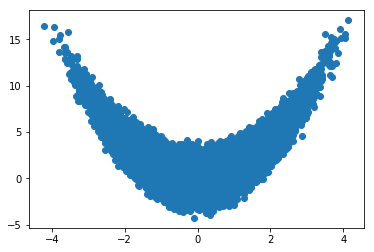

In [46]:
seed(226875)
data1 = randn(N) 
data2 = data1 ** 2 + randn(N) 
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
pyplot.scatter(data1, data2)
pyplot.show()
#print( data1, "n", data2 )
# Surrogate = Artificially created data

In [47]:
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[1.00678523 0.01427622]
 [0.01427622 3.02441571]]


In [48]:
print('No, the ideal target covariance of zero cannot be reached as long as the individual variables have some variance to them. Covariance could only be zero if the sample size is infinity, if the user is very lucky to hit a combination that has no covariance (unlikely), or if there is no noise in the surrogate generation process.')

No, the ideal target covariance of zero cannot be reached as long as the individual variables have some variance to them. Covariance could only be zero if the sample size is infinity, if the user is very lucky to hit a combination that has no covariance (unlikely), or if there is no noise in the surrogate generation process.


Pearsons correlation: 0.995


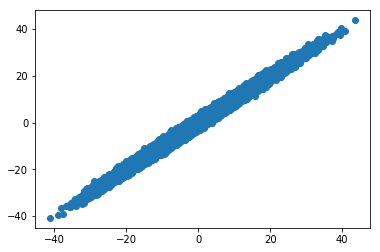

Pearsons correlation: -0.001


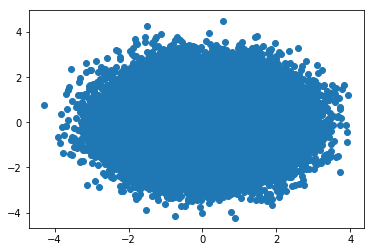

Pearsons correlation: 0.450


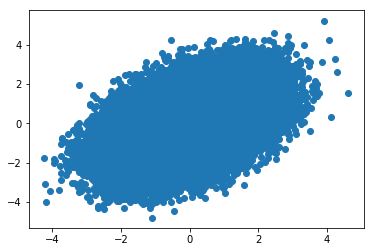

Pearsons correlation: -0.447


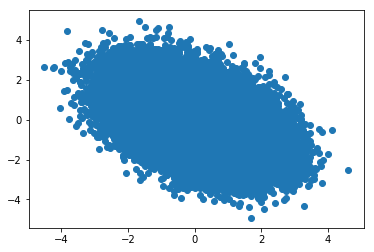

Pearsons correlation: -0.995


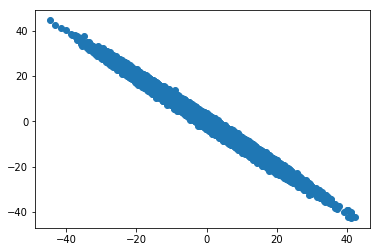

In [77]:
# b)
# Correlation 1
data1 = 10 * randn(N)
data2 = data1 * 1 + randn(N)
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
pyplot.scatter(data1, data2)
pyplot.show()

# Correlation 0
data1 = randn(N)
data2 = randn(N)
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
pyplot.scatter(data1, data2)
pyplot.show()

# Correlation 0.5
data1 = randn(N)
data2 = data1 * 0.5 + randn(N)
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
pyplot.scatter(data1, data2)
pyplot.show()

# Correlation -0.5
data1 = randn(N)
data2 = data1 * (-0.5) + randn(N)
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
pyplot.scatter(data1, data2)
pyplot.show()

# Correlation -1.0
data1 = 10 * randn(N)
data2 = data1 * (-1) + randn(N)
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
pyplot.scatter(data1, data2)
pyplot.show()

In [66]:
# c) Common effect case
X = randn(N)
Y = randn(N)
Z = X + Y + randn(N)
corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(X, Z)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.003
Pearsons correlation: 0.579


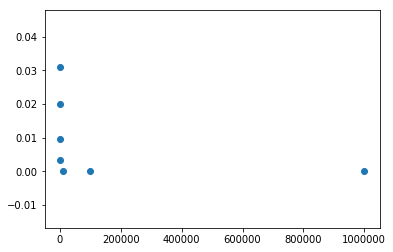

In [76]:
# d) Optional
runs_per_sample_size = 5
mean_of_this_set_of_samples = None
sample_sizes = [int(N/10000), int(N/5000), int(N/1000), int(N/100), int(N/10), N, N*10]
means = []
for sample_size in sample_sizes:
    mean = []
    for run in range(1, runs_per_sample_size):
        mean.append((np.var(randn(sample_size))))
    means.append(np.var(mean))
pyplot.scatter(sample_sizes, means)
pyplot.show()

In [52]:
seed(35) # seed random number generator
per = []
for i in range(2,19):
    datasize = 2**i
    data1 = randn(datasize)
    data2 = randn(datasize)
    corr, _ = pearsonr(data1, data2)
    percent = corr*100
    per.append ( percent )
    print('Size %i, Pearsons correlation: %.3f' % (datasize, percent))

Size 4, Pearsons correlation: 88.867
Size 8, Pearsons correlation: -35.029
Size 16, Pearsons correlation: -2.617
Size 32, Pearsons correlation: 11.485
Size 64, Pearsons correlation: 1.620
Size 128, Pearsons correlation: -20.313
Size 256, Pearsons correlation: -7.094
Size 512, Pearsons correlation: 3.042
Size 1024, Pearsons correlation: -1.673
Size 2048, Pearsons correlation: -4.054
Size 4096, Pearsons correlation: 0.646
Size 8192, Pearsons correlation: -1.140
Size 16384, Pearsons correlation: -0.204
Size 32768, Pearsons correlation: -0.633
Size 65536, Pearsons correlation: 0.074
Size 131072, Pearsons correlation: 0.387
Size 262144, Pearsons correlation: 0.223


In [53]:
mu=1
sigma=3
x = sigma * randn() + mu

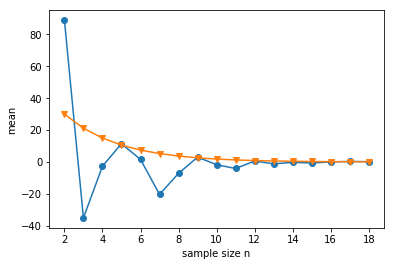

In [54]:
yy = []
for i in range(2, 19): 
    yy.append(60.0/(2**i)**0.5)
    #print (yy)
plt.plot(range(2, 19), per, marker='o')
plt.plot(range(2, 19), yy, marker='v')
plt.xlabel('sample size n')
plt.ylabel('mean')
plt.show()

In [55]:
import math
-math.log(0.0001)

9.210340371976182

In [56]:
seed(2) # seed of the random number generator
ensemblesize = 1000 # average over ensembles
for i in range(4,15): #data size loop
    datasize = 2**(i)
    percent = 0
    for j in range(1,ensemblesize): #ensemble loop
        data1 = randn(datasize)
        data2 = randn(datasize)
        corr, _ = pearsonr(data1, data2)
        percent = percent + corr
    percent = percent*100/ensemblesize
    print('Size %i, Pearsons correlation: %.3f' % (datasize, percent))
    

Size 16, Pearsons correlation: -0.150
Size 32, Pearsons correlation: 0.711
Size 64, Pearsons correlation: 0.049
Size 128, Pearsons correlation: 0.259
Size 256, Pearsons correlation: 0.261
Size 512, Pearsons correlation: 0.135
Size 1024, Pearsons correlation: -0.050
Size 2048, Pearsons correlation: -0.027
Size 4096, Pearsons correlation: -0.037
Size 8192, Pearsons correlation: -0.019
Size 16384, Pearsons correlation: -0.025
